<a href="https://colab.research.google.com/github/iamhannahkoh/DeepLearning/blob/main/Natural_Language_Processing_Subword_Encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Subword Encoders

**About the Data**

We will use TensorFlow imdb_reviews/subwords8k dataset in this exercise. This is a large movie review dataset desigend for binary sentiment classification. It uses tfds.deprecated.text.SubwordTextEncoder with 8k vocab size. You can find more information on this dataset here https://www.tensorflow.org/datasets/catalog/imdb_reviews.

**Subword Tokenization**

Subword Tokenization splits the peice of text into subwords (or n-gram chafacters). For example, words like "subword" can be segmented as "sub - word" and smartest as "smart- est". Subword algorithms can help to improve NLP model performance because subword is not too fine-grained and handles unseen words better than the "Word Embedding" technique does. 

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


### 1. Set up data

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info = True, as_supervised = True)

In [ ]:
# Train - Test Split
train_data, test_data = imdb["train"], imdb["test"]

### 2. Tokenizer

In this exercies, we will use a version of the IMDB dataset that has been pre-tokenized for you, but the tokenization is done on sub words. 

In [ ]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

### 3. Modeling

In [ ]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 12s 28ms/step - loss: 0.6881 - accuracy: 0.5583 - val_loss: 0.6185 - val_accuracy: 0.7658
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 0.5540 - accuracy: 0.7873 - val_loss: 0.4196 - val_accuracy: 0.8504
Epoch 3/10
391/391 [==============================] - 11s 28ms/step - loss: 0.3697 - accuracy: 0.8697 - val_loss: 0.3443 - val_accuracy: 0.8709
Epoch 4/10
391/391 [==============================] - 12s 28ms/step - loss: 0.2890 - accuracy: 0.8990 - val_loss: 0.3183 - val_accuracy: 0.8772
Epoch 5/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2488 - accuracy: 0.9101 - val_loss: 0.3145 - val_accuracy: 0.8741
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2228 - accuracy: 0.9213 - val_loss: 0.3080 - val_accuracy: 0.8810
Epoch 7/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2013 - accuracy: 0.9301 - val_loss: 0.3070 - val_accuracy:

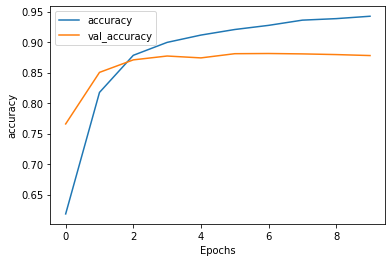

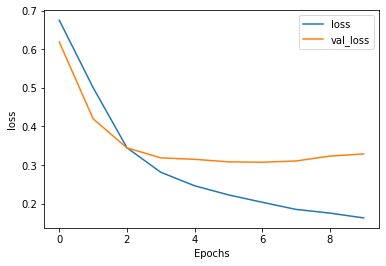

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Data source: DeepLearning.AI TensorFlow Developer Professional Certificate Specialization on Coursera